### ECE/CS/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2022 ###

# Project title goes here #

#### Student 1 (email address), Student 2 (email address), Student 3 (email address), and Student 4 (email address)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Integrated Model](#2.A.-Integrated-Model:-Economic-Environmental-Trade-Off)
1. [Solution](#3.-Solution)
  1. [Integrated Model](#3.A.-Integrated-Model)
    1. [Economic Mode](#3.A.a.-Economic-Mode)
    1. [Economic-Environmental Mode](#3.A.b.-Economic-Environmental-Mode)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Integrated Model](#4.A.-Integrated-Model)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

According to the Annual Energy Outlook 2022 published by the U.S. Energy Information Administration (EIA)[[1]](https://www.epa.gov/ghgemissions/overview-greenhouse-gases), crude oil production is higher than it has ever been. In addition, oil and gas prices are predicted to rise and then flatten out around 2050. This discovery is in direct contrast with the United States’ overall goal to decarbonize the energy sector and reduce greenhouse gas emissions. Carbon dioxide accounted for 79% of all U.S. greenhouse gas emissions in 2020 [[2]](https://www.epa.gov/ghgemissions/overview-greenhouse-gases). In the United States, most of the emissions of greenhouse gases caused by human activities come primarily from burning fossil fuels—coal, natural gas, and petroleum—for energy use. The following diagram from EIA's Monthly Energy Review indicates that petroleum was the major source of U.S. energy-related CO2 emissions, and transportation was the end-use sector that generated the most amount of carbon dioxide.

![eia-2021b.png](https://cdn.ihsmarkit.com/www/images/0721/eia-2021b.png)

Thus, in this project, our client will be the U.S. Department of Energy, who is interested in mitigate the environmental impacts of energy consumption. We will design a linear program that attempts to minimize the total cost of energy consumption in the USA. Our ultimate goal is to reduce the United States’ contribution to climate change and ease the financial burden of American residents. Therefore, we will also design a regularization program that attempts to minimize both the total cost and total carbon emissions caused by energy consumption in the U.S.

To understand the changing energy dynamics within the American energy sector, we will focus on using a linear program to understand the usage of energy that aims to minimize overall energy consumption cost. The following diagram illustrates how the problem is set up. Each of the left-hand-side nodes represents a type of energy source (renewable energy includes hydroelectric power, geothermal, biomass, solar and wind energy), and each of the right-hand-side nodes represents an end-use sector. 

The decision variables in this model are denoted by arrows in the diagram, which is the amount of energy transmitted from the source node to destination node. Source energy can be directly consumed by the end-use sectors or can be consumed by the electric power sector to generate electricity. Then end-use sectors can consumed electricity generated by the electric power sector. There will be an upper limit on the supply of each type of source energy, so one constraint of the model is to ensure consumption of each source energy does not exceed the maximum capacity. There will be similar constraints on the demand of each end-use sector, which indicates that the energy consumption in the United States should be able to seamlessly provide power to the grid so as to not disrupt the lives of everyday individuals. The objective function for this program would take account of both the total cost and total carbon emissions caused by energy consumption, as we hope to minimize the impact that this transition has upon the American population as well as the impact of the US energy sector upon global climate change. 

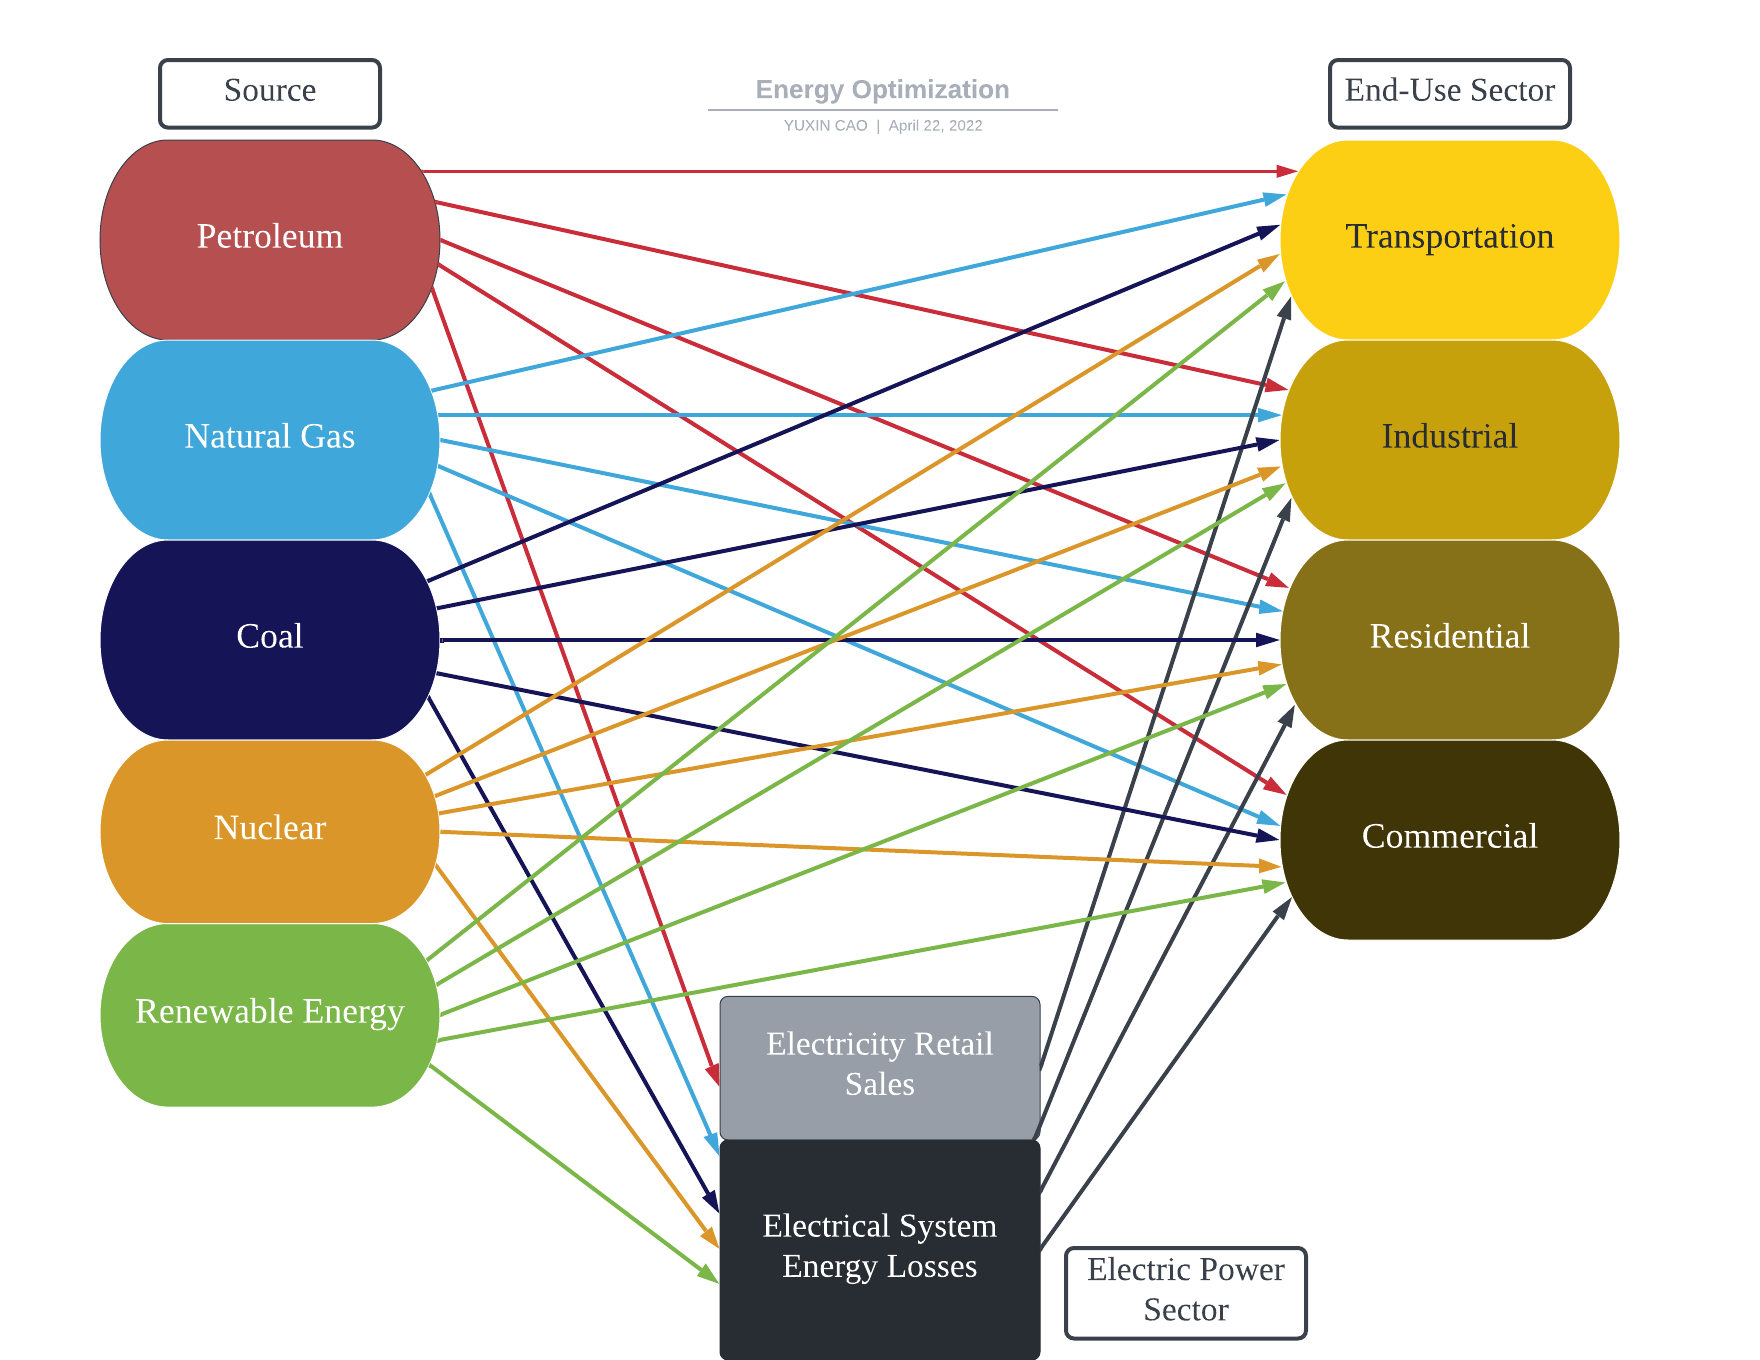

The data (i.e. problem parameters) used for this project was extracted from the Internet. Most of the data came from the Annual Energy Review published by the U.S. Energy Information Administration (EIA), consisting of information about energy consumption by sector, energy prices, energy-related carbon dioxide emissions, etc.

## 2. Mathematical model ##

To get started, we will implement an integrated model that incorporate energy use in different categories (e.g., electricity, transportation) and find optimal solutions according to our objectives. In order not to overcomplicate the model，we would assume that each source energy is consumed in only one fuel form. For instance, we would not consider whether the petroleum used is gasoline, diesel fuel or fuel oil. We plan to consider different fuel forms later when building optimization models for various sectors. 

There are two "modes" of this model. The economic mode only attempts to minimize the total cost of energy consumption in the objective function, which is a linear program. The economic-environmental mode attempts to minimize not only the total cost, but also the total energy-related carbon emissions, which becomes a regularization problem. A mathematical description of this model is given below. 

### 2.A Integrated Model: Economic-Environmental Trade-Off ##

#### Decision variables
The decision variable $x_{ij}$ represents the amount of energy source $i$ directly consumed by end-use sector $j$. In other words, it is the primary energy consumption of source $i$ by end-use sector $j$. $y_i$ denotes the amount of energy source $i$ input into the eletric power sector, and $z_j$ denotes the amount of electricity retail sales to sector $j$. Let $l_j$ denote the energy losses in end-use sector $j$. First, we need to encode the energy sources and sectors as following:

$$
i = 
\begin{cases}
  1 & \text{if energy source is petroleum} \\
  2 & \text{if energy source is natural gas} \\
  3 & \text{if energy source is coal} \\
  4 & \text{if energy source is nuclear} \\
  5 & \text{if energy source is hydroelectric power} \\
  6 & \text{if energy source is geothermal} \\
  7 & \text{if energy source is solar energy} \\
  8 & \text{if energy source is wind energy} \\
  9 & \text{if energy source is biomass}
\end{cases}
$$

$$
j = 
\begin{cases}
  1 & \text{if sector is transportation} \\
  2 & \text{if sector is industrial} \\
  3 & \text{if sector is residential} \\
  4 & \text{if sector is commercial}
\end{cases}
$$

#### Constraints
The supply of each energy source cannot exceed its annual production:
$$\sum_{j=1}^{4} x_{ij} + y_i \leq S_i \quad \forall i \in \{1,...,9\}$$
where $S_i$ is the total supply of energy in trillion Btu of energy source $i$.

Primary energy consumption should be greater than predicted demand in each end-use sector:
$$\sum_{i=1}^{9} x_{ij} \geq D_j \quad \forall j \in \{1,...,4\}$$
where $D_j$ is the primary energy consumption in trillion Btu in sector $j$.

Total losses are calculated as the primary energy consumed by the electric power sector minus the total electricity retail sales:
$$\sum_{j=1}^{4} l_j = \sum_{i=1}^{9} y_i - \sum_{j=1}^{4} z_j$$

Total energy consumption in the end-use sectors is the sum of primary energy consumption, electricity retail sales, and electrical system energy losses:
$$\sum_{i=1}^{9} x_{ij} + z_j + l_j \geq T_j \quad \forall j \in \{1,...,4\}$$
$$z_j + l_j = T_j - D_j \quad \forall j \in \{1,...,4\}$$
where $T_j$ is the total energy consumption in trillion Btu in sector $j$.

Overall, according to EIA, about two thirds of total energy input is lost in conversion inside the electrical system. So we assume that the total electricity retail sales is equal to one third of total energy input into the electric power sector:
$$\sum_{j=1}^{4} z_j = \frac{1}{3}\sum_{i=1}^{9} y_i$$

#### Objective 1: Economic Mode
The first version of objective only considers the economic aspect of energy consumption, so the goal is to minimize the total cost of energy consumption:
$$\underset{x_{ij},y_i,z_j}{\text{minimize}}\qquad \sum_{j=1}^{4} \sum_{i=1}^{9} c_i x_{ij} + \sum_{i=1}^{9} c_iy_i + \sum_{j=1}^{4} b_jz_j$$
where $c_i$ is the Levelized Cost of Energy(LCOE) of each energy source $i$, and $b_j$ is the electricity retail price to end-use sector $j$.

#### Objective 2: Economic-Environmental Mode
The second version of objective consider not only the economic interest but also the environmental impact of energy consumption, so the total carbon dioxide emissions result from energy consumption are added as a regularizer $CO2(x,y,z)$:
        $$\underset{x_{ij},y_i,z_j}{\text{minimize}}\qquad (1-\lambda)\sum_{j=1}^{4} \sum_{i=1}^{9} c_i x_{ij} + \sum_{i=1}^{9} c_iy_i + \sum_{j=1}^{4} b_jz_j + \lambda R(x,y,z)$$
$$R(x,y,z) = \sum_{j=1}^{4} \sum_{i=1}^{9} P_{i}x_{ij} + \sum_{i=1}^{9} P_{i} y_{i} + \sum_{j=1}^{4} Q_{j} z_{j}$$
$$\lambda \in [0,1]$$
where $P_{i}$ is the average amount of CO2 emissions produced by consuming one unit of energy source $i$ in any end-use sector or electric power sector, and $Q_j$ is the CO2 emissions produced by consuming one unit of electricity in any end-use sector.

## 3. Solution ##

### 3.A. Integrated Model ###

#### 3.A.a.  Economic Mode ####

For basic implementation, we start with U.S. energy consumption in 2020 as an example to illstrate how this model works. We first implement the integration model 1 using the objective 1, where we consider minimizing the total cost of energy consumption.

In [1]:
# Total supply/production of energy source i (MWh)
S = [ 23233.382, 42473.387, 11561.319, 8128.571, 2282.953, 205.955, 1501.231, 3331.698, 4995.523 ]
S = S * 293071.070172222
# Primary energy consumption by end-use sector j (MWh)
D = [ 26873.431, 22538.214, 6625.45, 17373.318 ]
D = D * 293071.070172222
# Total energy consumption by end-use sector j (MWh)
T = [ 26935.287, 32088.035, 20915.077, 17373.318 ]
T = T * 293071.070172222

# Costs of primary energy consumption of energy source i ($/MWh)
# costs =
#   [ 38.765 38.765 38.765 38.765
#     20.847 20.847 20.847 20.847
#     112 112 112 112
#     163 163 163 163
#     65.581 65.581 65.581 65.581
#     80 80 80 80
#     37 37 37 37
#     40 40 40 40
#     90.17 90.17 90.17 90.17 ]
costs =
  [ 38.765 38.765 38.765 38.765
    65.6 65.6 65.6 65.6
    52.11 52.11 52.11 52.11
    60.71 60.71 60.71 60.71
    65.581 65.581 65.581 65.581
    80 80 80 80
    37 37 37 37
    40 40 40 40
    90.17 90.17 90.17 90.17 ]

# Average retail prices of electricity to sector j ($/MWh)
b = [ 102.1, 72.6, 137.2, 112.7 ]
# Average carbon dioxide emissions per unit by energy source (lbs/MWh)
P =
  [ 1778 1778 1778 1778
    898 898 898 898
    2180 2180 2180 2180
    26.46 26.46 26.46 26.46
    52.91 52.91 52.91 52.91
    84 84 84 84
    90.39 90.39 90.39 90.39
    24.25 24.25 24.25 24.25
    507.063 507.063 507.063 507.063 ]
# Average carbon dioxide emissions per unit of eletricity consumption by sector (lbs/MWh)
Q = [ 884.2, 884.2, 884.2, 884.2 ]

4-element Vector{Float64}:
 884.2
 884.2
 884.2
 884.2

In [2]:
using JuMP, Cbc

model = Model(with_optimizer(Cbc.Optimizer,OutputFlag=0))

n_i = 9
n_j = 4

@variable(model, x[1:n_i,1:n_j] >= 0) # primary energy consumption of source i by end-use sector j
@variable(model, y[1:n_i] >= 0) # amount of energy source i input into electic power sector 
@variable(model, z[1:n_j] >= 0) # amount of electicity retail sales to sector j
@variable(model, l[1:n_j] >= 0) # energy losses in end-use sector j

# upper bounds on total supply of each type of energy source
for i in 1:n_i
    @constraint(model, sum(x[i,j] for j in 1:n_j) + y[i] <= S[i])
end

# total energy losses in eletric power sector is equal to electric primary consumption
# minus total electricity retail sales
@constraint(model, sum(l[j] for j in 1:n_j) == sum(y[i] for i in 1:n_i) - sum(z[j] for j in 1:n_j))

for j in 1:n_j
    # lower bounds on total energy consumption of each end-use sector
    @constraint(model, sum(x[i,j] for i in 1:n_i) >= D[j])
    # sum of electricity retail sales and eletrical energy losses in each end-use sector
    # is equal to total consumption minus primary consumption in each end-use sector
    @constraint(model, z[j] + l[j] >= T[j] - D[j])
end

# total electricity retail sales only account for about one-third of total energy input
# into the electricity sector (energy losses account for about two-thirds)
@constraint(model, sum(z[j] for j in 1:n_j) == sum(y[i] for i in 1:n_i)/3)

# minimize total cost of energy consumption
@objective(model, Min, sum(costs[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
    sum(costs[i,1]*y[i] for i in 1:n_i) + sum(b[j]*z[j] for j in 1:n_j))

optimize!(model)
println(termination_status(model))

OPTIMAL
Presolve 18 (-1) rows, 52 (-1) columns and 116 (-3) elements
0  Obj 0 Primal inf 2.8519249e+10 (7)
31  Obj 1.7945791e+12 Primal inf 6.5236184e+08 (8)
41  Obj 1.7966524e+12
Optimal - objective value 1.7966524e+12
After Postsolve, objective 1.7966524e+12, infeasibilities - dual 0 (0), primal 8.5367432e-07 (1)
Presolved model was optimal, full model needs cleaning up
Optimal - objective value 1.7966524e+12
Optimal objective 1.796652449e+12 - 41 iterations time 0.002, Presolve 0.00


In [3]:
using JuMP, NamedArrays
source = collect(1:n_i)
sector = collect(1:n_j)
SOURCES = [:Petroleum,:Natural_Gas,:Coal,:Nuclear,:Hydroelectric,:Geothermal,:Solar,:Wind,:Biomass]
SECTORS = [:Transportation,:Industrial,:Residential,:Commercial]
Abbr = [:Transport,:Industrial,:Residential,:Commercial]
energy = NamedArray([(value.(x[i,j])) for i in source, j in sector], (SOURCES, Abbr), ("SOURCES","SECTORS"))

9×4 Named Matrix{Float64}
SOURCES ╲ SECTORS │   :Transport   :Industrial  :Residential   :Commercial
──────────────────┼───────────────────────────────────────────────────────
:Petroleum        │          0.0           0.0     2.46741e8           0.0
:Natural_Gas      │    6.52968e9     4.22305e9     1.69499e9           0.0
:Coal             │          0.0           0.0           0.0     3.38829e9
:Nuclear          │          0.0     2.38225e9           0.0           0.0
:Hydroelectric    │          0.0           0.0           0.0     2.86937e8
:Geothermal       │          0.0           0.0           0.0           0.0
:Solar            │          0.0           0.0           0.0     4.39967e8
:Wind             │          0.0           0.0           0.0     9.76424e8
:Biomass          │    1.34614e9           0.0           0.0           0.0

In [4]:
for i in 1:n_i
    print("Electricity generated by ", SOURCES[i], ": ")
    println(value.(y[i]))
end

Electricity generated by Petroleum: 6.562290903344923e9
Electricity generated by Natural_Gas: 0.0
Electricity generated by Coal: 0.0
Electricity generated by Nuclear: 0.0
Electricity generated by Hydroelectric: 3.821303861893679e8
Electricity generated by Geothermal: 6.035945225731998e7
Electricity generated by Solar: 0.0
Electricity generated by Wind: 0.0
Electricity generated by Biomass: 0.0


In [5]:
for j in 1:n_j
    print("Electricity consumed by ", SECTORS[j], ": ")
    println(value.(z[j]))
end

Electricity consumed by Transportation: 0.0
Electricity consumed by Industrial: 2.3349269139305363e9
Electricity consumed by Residential: 0.0
Electricity consumed by Commercial: 0.0


#### 3.A.b.  Economic-Environmental Mode
Then, we will implement the integration model 1 using the second version of the objective, where we want to minimize both total cost and total carbon dioxide emissions of energy consumption. We will write a function to generate the regularization model, solve optimization model, and return solution for a given tuning parameter.

In [6]:
using JuMP, Gurobi

# Function to generate model, solve optimization problem 
# and return solution for a given λ
function solveOpt(λ)
    model = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))

    n_i = 9
    n_j = 4

    @variable(model, x[1:n_i,1:n_j] >= 0) # primary energy consumption of source i by end-use sector j
    @variable(model, y[1:n_i] >= 0) # amount of energy source i input into electic power sector 
    @variable(model, z[1:n_j] >= 0) # amount of electicity retail sales to sector j
    @variable(model, l[1:n_j] >= 0) # energy losses in end-use sector j

    # upper bounds on total supply of each type of energy source
    for i in 1:n_i
        @constraint(model, sum(x[i,j] for j in 1:n_j) + y[i] <= S[i])
    end

    # total energy losses in eletric power sector is equal to electric primary consumption
    # minus total electricity retail sales
    @constraint(model, sum(l[j] for j in 1:n_j) == sum(y[i] for i in 1:n_i) - sum(z[j] for j in 1:n_j))

    for j in 1:n_j
        # lower bounds on total energy consumption of each end-use sector
        @constraint(model, sum(x[i,j] for i in 1:n_i) >= D[j])
        # sum of electricity retail sales and eletrical energy losses in each end-use sector
        # is equal to total consumption minus primary consumption in each end-use sector
        @constraint(model, z[j] + l[j] >= T[j] - D[j])
    end

    # total electricity retail sales only account for about one-third of total energy input
    # into the electricity sector (energy losses account for about two-thirds)
    @constraint(model, sum(z[j] for j in 1:n_j) == sum(y[i] for i in 1:n_i)/3)

    # minimize total cost of energy consumption as well as total CO2 emissions
    @objective(model, Min, (1-λ)*(sum(costs[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(costs[i,1]*y[i] for i in 1:n_i) + sum(b[j]*z[j] for j in 1:n_j)) + 
        λ*(sum(P[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(P[i,1]*y[i] for i in 1:n_i) + sum(Q[j]*z[j] for j in 1:n_j)))
    
    optimize!(model)
    
    # optimal value of total cost of energy consumption
    J1 = JuMP.value.(sum(costs[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(costs[i,1]*y[i] for i in 1:n_i) + sum(b[j]*z[j] for j in 1:n_j))
    # optimal value of total carbon dioxide emissions of energy consumption
    J2 = JuMP.value.(sum(P[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(P[i,1]*y[i] for i in 1:n_i) + sum(Q[j]*z[j] for j in 1:n_j))
    # optimal values of energy i directly consumed by an end-use sector j
    xopt = JuMP.value.(x)
    # optimal values of energy i consumed by electric power sector
    yopt = JuMP.value.(y)
    # optimal values of electricity consumed by an end-use sector j
    zopt = JuMP.value.(z)
    
    return (J1,J2,xopt,yopt,zopt)
end
;

To examine the effect of adding an additional term to the objective on optimal solutions , we will first illustrate a detailed optimal solution for very large $\lambda$, which puts almost all the weight on the second objective - minimize the total carbon emissions.

In [7]:
λ1 = 0.99
(J1,J2,x1,y1,z1) = solveOpt(λ1)
println("Optimal objective J1 is ", J1)
println("Optimal objective J2 is ", J2)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-09
Optimal objective J1 is 1.8011398399893306e12
Optimal objective J2 is 3.338780833488647e13


In [8]:
using JuMP, NamedArrays
Abbr = [:Transport,:Industrial,:Residential,:Commercial]
energy1 = NamedArray([ x1[i,j] for i in source, j in sector], (SOURCES, Abbr), ("SOURCES","SECTORS"))

9×4 Named Matrix{Float64}
SOURCES ╲ SECTORS │   :Transport   :Industrial  :Residential   :Commercial
──────────────────┼───────────────────────────────────────────────────────
:Petroleum        │    9.95578e8     1.19092e9           0.0           0.0
:Natural_Gas      │          0.0     5.41438e9     1.94173e9     5.09162e9
:Coal             │    3.27039e9           0.0           0.0           0.0
:Nuclear          │          0.0           0.0           0.0           0.0
:Hydroelectric    │    6.69067e8           0.0           0.0           0.0
:Geothermal       │    6.03595e7           0.0           0.0           0.0
:Solar            │    4.39967e8           0.0           0.0           0.0
:Wind             │    9.76424e8           0.0           0.0           0.0
:Biomass          │    1.46404e9           0.0           0.0           0.0

In [9]:
for i in 1:n_i
    print("Electricity generated by ", SOURCES[i], ": ")
    println(y1[i])
end

Electricity generated by Petroleum: 4.622531739850722e9
Electricity generated by Natural_Gas: 0.0
Electricity generated by Coal: 0.0
Electricity generated by Nuclear: 2.3822490019408884e9
Electricity generated by Hydroelectric: 0.0
Electricity generated by Geothermal: 0.0
Electricity generated by Solar: 0.0
Electricity generated by Wind: 0.0
Electricity generated by Biomass: 0.0


In [10]:
for j in 1:n_j
    print("Electricity consumed by ", SECTORS[j], ": ")
    println(z1[j])
end

Electricity consumed by Transportation: 0.0
Electricity consumed by Industrial: 2.3349269139305367e9
Electricity consumed by Residential: 0.0
Electricity consumed by Commercial: 0.0


#### 3.A.c. Next Steps

The above code implementation is an example of how our model works using data in 2020. We plan to collect more data about U.S. energy production and consumption in different categories in future decades by either using projections from other institutions or doing our own predictions.

## 4. Results and discussion ##

### 4.A. Integrated Model

We use stacked bar plots to visualize our results. Below are two plots for the linear model with the objective of minimizing cost. The first bar plot displays the amount of energy consumption (in megawatt-hours) for each of the energy sources, grouped by sectors. The second bar plot displays the amount of energy consumption (in megawatt-hours) for each of the sectors, grouped by sources.

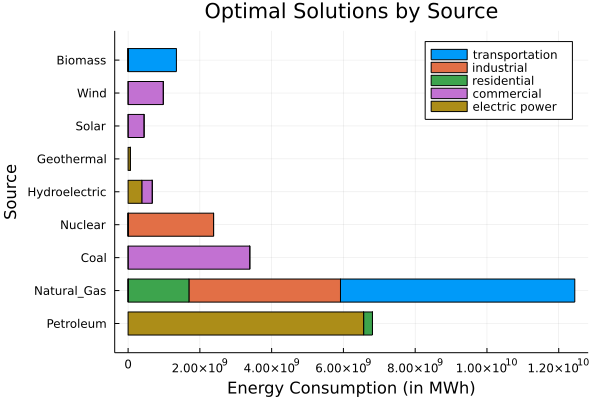

In [11]:
using StatsPlots

# SOURCES = [:Petroleum,:Natural_Gas,:Coal,:Nuclear,:Hydroelectric,:Geothermal,:Solar,:Wind,:Biomass]
# SECTORS = [:Transportation,:Industrial,:Residential,:Commercial]

transportation = energy[:, :Transport]
industrial = energy[:, :Industrial]
residential = energy[:, :Residential]
commercial = energy[:, :Commercial]
electric_power = NamedArray([(value.(y[i])) for i in source], (SOURCES), ("SOURCES"))

ticklabel = SOURCES
groupedbar([transportation industrial residential commercial electric_power ],
        bar_position = :stack,
        bar_width=0.7,
        xlabel = "Energy Consumption (in MWh)",
        ylabel = "Source",
        yticks=(1:n_i, ticklabel),
        label=["transportation" "industrial" "residential" "commercial" "electric power "],
        title = "Optimal Solutions by Source",
        orientation = :horizontal)

To minimize the total cost of energy consumption, natural gas should be the most consumed energy source, then the petroleum. Renewable energy is usually more expensive so less renewable energy is consumed.

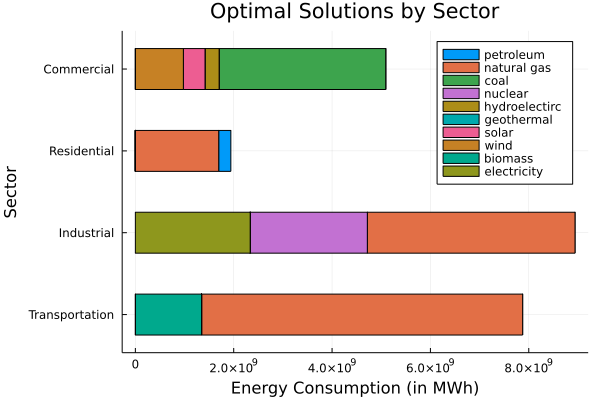

In [12]:
using StatsPlots

# SOURCES = [:Petroleum,:Natural_Gas,:Coal,:Nuclear,:Hydroelectric,:Geothermal,:Solar,:Wind,:Biomass]
# SECTORS = [:Transportation,:Industrial,:Residential,:Commercial]

petroleum = energy[:Petroleum, :]
gas = energy[:Natural_Gas, :]
coal = energy[:Coal, :]
nuclear = energy[:Nuclear, :]
hydro = energy[:Hydroelectric, :]
geothermal = energy[:Geothermal, :]
solar = energy[:Solar, :]
wind = energy[:Wind, :]
biomass = energy[:Biomass, :]
electricity = NamedArray([(value.(z[j])) for j in sector], (Abbr), ("SECTORS"))

ticklabel = [:Transportation,:Industrial,:Residential,:Commercial,:Electricity]
groupedbar([petroleum gas coal nuclear hydro geothermal solar wind biomass electricity],
        bar_position = :stack,
        bar_width=0.5,
        xlabel = "Energy Consumption (in MWh)",
        ylabel = "Sector",
        yticks=(1:n_j, ticklabel),
        label=["petroleum" "natural gas" "coal" "nuclear" "hydroelectirc" "geothermal" "solar" "wind" "biomass" "electricity"],
        title = "Optimal Solutions by Sector",
        orientation = :horizontal)

Industrial energy consumption is the most among four end-use sectors, while residential consumption is the least. Commercial sector consumed various types of energy, including wind, solar, hydroelectric, and coal.

Below are two plots that illustrate the optimal solutions for the model with the objective considering both cost and carbon emissions. Similarly, one plot shows the energy consumption for each energy source grouped by sectors, and another plot shows the energy consumption for each end-use sectors grouped by energy sources.

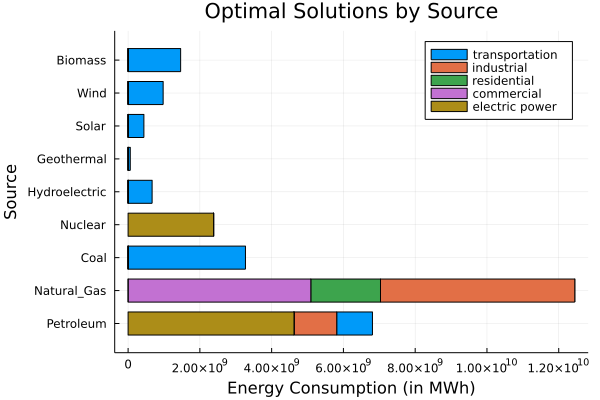

In [16]:
using StatsPlots

# SOURCES = [:Petroleum,:Natural_Gas,:Coal,:Nuclear,:Hydroelectric,:Geothermal,:Solar,:Wind,:Biomass]
# SECTORS = [:Transportation,:Industrial,:Residential,:Commercial]

transportation = energy1[:, :Transport]
industrial = energy1[:, :Industrial]
residential = energy1[:, :Residential]
commercial = energy1[:, :Commercial]
electric_power = NamedArray([(value.(y1[i])) for i in source], (SOURCES), ("SOURCES"))

ticklabel = SOURCES
groupedbar([transportation industrial residential commercial electric_power ],
        bar_position = :stack,
        bar_width=0.7,
        xlabel = "Energy Consumption (in MWh)",
        ylabel = "Source",
        yticks=(1:n_i, ticklabel),
        label=["transportation" "industrial" "residential" "commercial" "electric power "],
        title = "Optimal Solutions by Source",
        orientation = :horizontal)

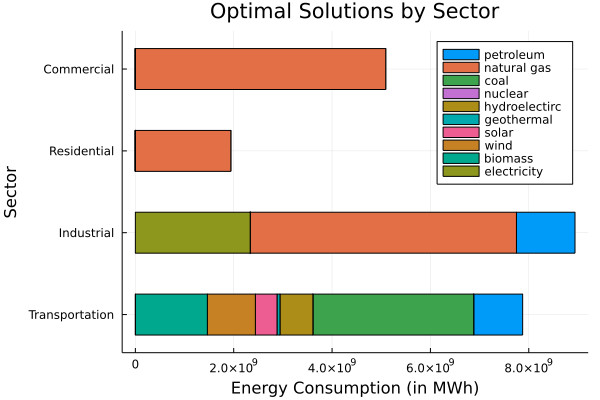

In [17]:
using StatsPlots

# SOURCES = [:Petroleum,:Natural_Gas,:Coal,:Nuclear,:Hydroelectric,:Geothermal,:Solar,:Wind,:Biomass]
# SECTORS = [:Transportation,:Industrial,:Residential,:Commercial]

petroleum = energy1[:Petroleum, :]
gas = energy1[:Natural_Gas, :]
coal = energy1[:Coal, :]
nuclear = energy1[:Nuclear, :]
hydro = energy1[:Hydroelectric, :]
geothermal = energy1[:Geothermal, :]
solar = energy1[:Solar, :]
wind = energy1[:Wind, :]
biomass = energy1[:Biomass, :]
electricity = NamedArray([(value.(z1[j])) for j in sector], (Abbr), ("SECTORS"))

ticklabel = [:Transportation,:Industrial,:Residential,:Commercial,:Electricity]
groupedbar([petroleum gas coal nuclear hydro geothermal solar wind biomass electricity],
        bar_position = :stack,
        bar_width=0.5,
        xlabel = "Energy Consumption (in MWh)",
        ylabel = "Sector",
        yticks=(1:n_j, ticklabel),
        label=["petroleum" "natural gas" "coal" "nuclear" "hydroelectirc" "geothermal" "solar" "wind" "biomass" "electricity"],
        title = "Optimal Solutions by Sector",
        orientation = :horizontal)